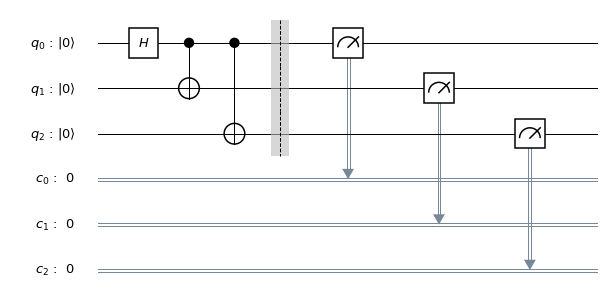

In [1]:
# We are going to be recreating the same experiment as in the past tutorial, so we will use the same commands:
import numpy as np
from qiskit import *
%matplotlib inline

# Now we create te qubits and the circuit
q = QuantumRegister(3, 'q')
circ = QuantumCircuit(q)

# And we apply the gates
circ.h(q[0])
circ.cx(q[0], q[1])
circ.cx(q[0], q[2])

# Next we add the classical bits and complete the circuit
c = ClassicalRegister(3, 'c')
meas = QuantumCircuit(q, c)
meas.barrier(q)
meas.measure(q,c)
qc = circ + meas

# We will show the circuit too to keep track of what we are doing
qc.draw(output='mpl')

In [2]:
# Now we want to implement our circuit in a real quantum computer
# To do that, we have to use our API key to log-in
# First we have to import the IBM Q service with the command:

from qiskit import IBMQ

In [3]:
# Now, we have to save out account. 
# In order to do that we will first delete every account we may have stored

IBMQ.delete_accounts()

# And assure we have deleted all accounts

IBMQ.stored_accounts()

[]

In [4]:
# Now we have to save our account into our computer
# To do that, we simply run the command

IBMQ.save_account('APIKEYTOKENHERE', 'URLHERE')

In [5]:
# Now we load our credentials

IBMQ.load_accounts()

In [6]:
# Here we want to see how many backends we have available
# In order to do that we run the following commands

print("Available backends:")
IBMQ.backends()

# This will show us which backends do we have available

Available backends:


[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(ibm-q, open, main)>,
 <IBMQBackend('ibmqx4') from IBMQ(ibm-q, open, main)>,
 <IBMQBackend('ibmqx2') from IBMQ(ibm-q, open, main)>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(ibm-q, open, main)>]

In [7]:
# Now we want to use the best backend for our project
# In order to do that we have to see which one fits our experiment the best
# We are goint to import the package that allows us to do that

from qiskit.providers.ibmq import least_busy

In [8]:
#Now we select the least busy backend
#First we create a list of the backends with certain properties

usefulbackends=IBMQ.backends(filters=lambda x: x.configuration().n_qubits >= 4 and
                                                       not x.configuration().simulator)

# In this case we want to find a device that can support our program
# And a device that is not a simulator

# The number of qubits can be modified
# Since we are using three qubits, we just run .n_qubits >= 3 
# Three or more qubits
# We print those devices
usefulbackends

[<IBMQBackend('ibmqx4') from IBMQ(ibm-q, open, main)>,
 <IBMQBackend('ibmqx2') from IBMQ(ibm-q, open, main)>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(ibm-q, open, main)>]

In [9]:
# From all of the above, that are useful for our purposes 
# we find the one with the shortest queue in order to 
# implement our program as soon as posible

backend=least_busy(usefulbackends)

# And we print it in order to know which one is it

print("The best backend is " + backend.name())

The best backend is ibmqx2


In [10]:
# We now import the package that allows us to do a job

from qiskit.tools.monitor import job_monitor

In [11]:
# Now, to use a real IBM Q computer we have to use some credits
# We have a total of 15 credits to use, and they regenerate every 24h
# or when the experiment has run out of the queue
# Each experiment costs between 3 and 5 credits
# Therefore, it is useful to use the simmulator first and the run the experiment
# We have to specify the maximum number of credits we want to spend

max_credits = 3

In [12]:
# And now we have to specify how many times do we have to run the experiment

shots = 1024

In [13]:
# With all that information we can create a job

job=execute(qc, backend=backend, shots=shots, max_credits=max_credits)

# We are going to run the qc circuit with the backend we selected before

In [14]:
# To check the status of our job we run the following command

job_monitor(job)

Job Status: job has successfully run


In [15]:
# Once our job has succesfully run, we want to extract the results

result=job.result()

In [16]:
# To get the times every state has been obtained we use

counts=result.get_counts(qc)

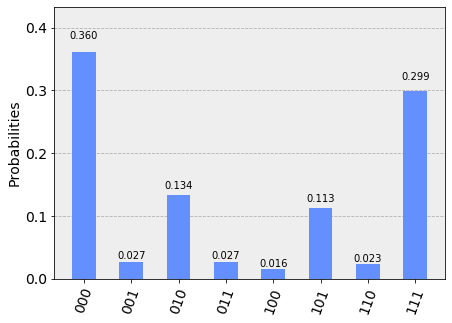

In [17]:
# And we plot the histogram of the experiment
from qiskit.visualization import plot_histogram
plot_histogram(counts)

In [18]:
# If we compare the experimental results with the simulation 
# We see that the 50% probabilities of each state does not hold
# We run now the simulation
backendsim = BasicAer.get_backend('qasm_simulator')
jobsim = execute(qc, backendsim, shots=1024)
resultsim = jobsim.result()
countssim = resultsim.get_counts(qc)

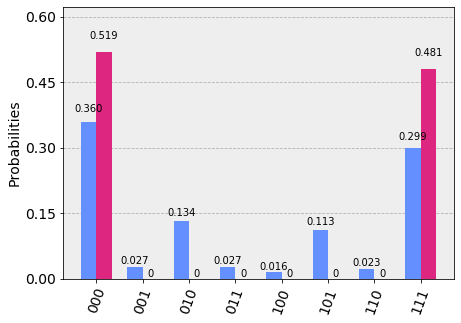

In [19]:
# We now plot the experimental results with the simulation
plot_histogram([counts, countssim])

In [ ]:
# Seeing here the error one can find in the gates